In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d=pd.read_csv('preprocess.csv')
d.head()

,Unnamed: 0,loan_amnt,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog,annual_inc_joint,dti_joint,verification_status_joint,mths_since_recent_bc_dlq,mths_since_recent_revol_delinq,revol_bal_joint,terms_compl
0,0,16000,16000,60,12.74,361.93,C,10,MORTGAGE,130000.0,...,42.0,79.0,0.0,0.0,0.0,0,0.0,42.0,0.0,13.0
1,1,11875,11875,36,11.44,391.26,B,10,MORTGAGE,55000.0,...,75.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0
2,2,26000,26000,60,15.99,632.14,C,10,RENT,52000.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0
3,3,35000,35000,36,19.99,1300.55,D,10,MORTGAGE,80000.0,...,4.0,0.0,48.0,0.0,0.0,0,48.0,48.0,0.0,23.0
4,4,14000,14000,60,12.74,316.69,C,4,OWN,40000.0,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,23.0


In [3]:
d=d[d['loan_status']!=2]

In [4]:
cat = d[['term',  'grade','issue_d', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 
     'addr_state', 'initial_list_status', 'application_type', 'hardship_flag', 
     'disbursement_method','debt_settlement_flag', 'verification_status_joint']]
d1=pd.get_dummies(data=d,columns=cat.columns,drop_first=True)
d1.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
d1train=d1[d1['loan_status']!=2]
d1current=d1[d1['loan_status']==2]

In [20]:
from sklearn.model_selection import train_test_split
x=d1train[['funded_amnt', 'int_rate',  'installment',  'emp_length',  'dti',  'earliest_cr_line',  'inq_last_6mths',  
'open_acc', 'revol_util',  'total_acc',  'total_rec_prncp',  'total_rec_int',  'last_credit_pull_d',  'acc_now_delinq',  
'open_acc_6m',  'open_act_il',  'open_il_24m',  'mths_since_rcnt_il',  'il_util',  'open_rv_12m',  'open_rv_24m',  
'max_bal_bc',  'all_util',  'inq_fi',  'inq_last_12m',  'acc_open_past_24mths',  'bc_util',  'delinq_amnt',  
'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',  'mo_sin_rcnt_rev_tl_op',  'mo_sin_rcnt_tl',  'mort_acc', 
'mths_since_recent_bc', 'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl',  'num_actv_rev_tl',  
'num_bc_sats',  'num_bc_tl',  'num_il_tl',  'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',  'num_sats', 
'num_tl_90g_dpd_24m',  'num_tl_op_past_12m',  'percent_bc_gt_75', 'pub_rec_bankruptcies',  'sec_app_earliest_cr_line', 
'sec_app_inq_last_6mths',  'sec_app_mort_acc',  'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il',  
'sec_app_num_rev_accts',  'sec_app_collections_12_mths_ex_med',  'sec_app_mths_since_last_major_derog',  
'mths_since_last_delinq',  'mths_since_last_record',  'mths_since_last_major_derog', 'dti_joint', 
'mths_since_recent_bc_dlq',  'mths_since_recent_revol_delinq',  'terms_compl',  'grade_B',  'grade_C', 'grade_D',  
'grade_E',  'grade_G',  'home_ownership_OWN', 'home_ownership_RENT',  'verification_status_1', 'pymnt_plan_1',
'purpose_debt_consolidation', 'purpose_major_purchase', 'purpose_small_business', 'addr_state_AR', 
'addr_state_CO', 'addr_state_FL', 'addr_state_IL', 'addr_state_IN', 'addr_state_KS', 'addr_state_MA', 
'addr_state_MD', 'addr_state_MI', 'addr_state_MN', 'addr_state_MO', 'addr_state_MS', 'addr_state_NC', 
'addr_state_NJ', 'addr_state_NM', 'addr_state_NV', 'addr_state_NY', 'addr_state_OH', 'addr_state_OK', 
'addr_state_TN', 'addr_state_UT', 'addr_state_VA', 'addr_state_WA', 'addr_state_WI', 'application_type_1', 
'hardship_flag_1', 'issue_d_2', 'issue_d_3', 'issue_d_4', 'issue_d_5',
'issue_d_7', 'issue_d_8', 'issue_d_10', 'issue_d_11', 'issue_d_12', 'total_rec_late_fee']]
y=d1train['loan_status']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [7]:
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [10]:
n_estimators=[]
acc_train=[]
acc_test=[]
auc_train=[]
auc_test=[]
for i in range(20,200,20):   
    lgb=LGBMClassifier(n_estimators=i)
    lgb.fit(X_train,y_train)
    y_train_pred=lgb.predict(X_train)
    y_train_prob=lgb.predict_proba(X_train)[:,1]

    acc_train.append(accuracy_score(y_train,y_train_pred))
    auc_train.append(roc_auc_score(y_train,y_train_prob))

    y_test_pred=lgb.predict(X_test)
    y_test_prob=lgb.predict_proba(X_test)[:,1]
    acc_test.append(accuracy_score(y_test,y_test_pred))
    auc_test.append(roc_auc_score(y_test,y_test_prob))
    print(i)

20
40
60
80
100
120
140
160
180


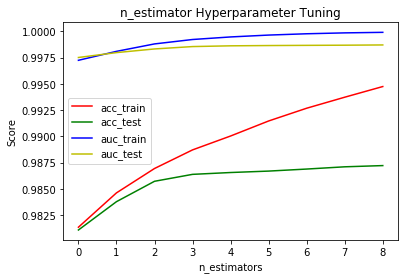

In [13]:
plt.plot(acc_train,color='r',label='acc_train')
plt.plot(acc_test,color='g',label='acc_test')
plt.plot(auc_train,color='b',label='auc_train')
plt.plot(auc_test,color='y',label='auc_test')
plt.xlabel('n_estimators')
plt.ylabel('Score')
plt.title('n_estimator Hyperparameter Tuning')
plt.legend()
plt.show()

In [14]:
acc_train=[]
acc_test=[]
auc_train=[]
auc_test=[]
for i in range(10,50,5):   
    lgb=LGBMClassifier(num_leaves=i)
    lgb.fit(X_train,y_train)
    y_train_pred=lgb.predict(X_train)
    y_train_prob=lgb.predict_proba(X_train)[:,1]

    acc_train.append(accuracy_score(y_train,y_train_pred))
    auc_train.append(roc_auc_score(y_train,y_train_prob))

    y_test_pred=lgb.predict(X_test)
    y_test_prob=lgb.predict_proba(X_test)[:,1]
    acc_test.append(accuracy_score(y_test,y_test_pred))
    auc_test.append(roc_auc_score(y_test,y_test_prob))
    print(i)

10
15
20
25
30
35
40
45


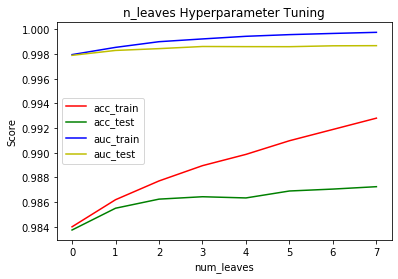

In [16]:
plt.plot(acc_train,color='r',label='acc_train')
plt.plot(acc_test,color='g',label='acc_test')
plt.plot(auc_train,color='b',label='auc_train')
plt.plot(auc_test,color='y',label='auc_test')
plt.xlabel('num_leaves')
plt.ylabel('Score')
plt.title('n_leaves Hyperparameter Tuning')
plt.legend()
plt.show()

In [17]:
acc_train=[]
acc_test=[]
auc_train=[]
auc_test=[]
for i in range(2,20,2):   
    lgb=LGBMClassifier(max_depth=i)
    lgb.fit(X_train,y_train)
    y_train_pred=lgb.predict(X_train)
    y_train_prob=lgb.predict_proba(X_train)[:,1]

    acc_train.append(accuracy_score(y_train,y_train_pred))
    auc_train.append(roc_auc_score(y_train,y_train_prob))

    y_test_pred=lgb.predict(X_test)
    y_test_prob=lgb.predict_proba(X_test)[:,1]
    acc_test.append(accuracy_score(y_test,y_test_pred))
    auc_test.append(roc_auc_score(y_test,y_test_prob))
    print(i)

2
4
6
8
10
12
14
16
18


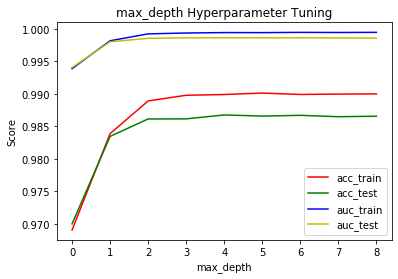

In [18]:
plt.plot(acc_train,color='r',label='acc_train')
plt.plot(acc_test,color='g',label='acc_test')
plt.plot(auc_train,color='b',label='auc_train')
plt.plot(auc_test,color='y',label='auc_test')
plt.xlabel('max_depth')
plt.ylabel('Score')
plt.title('max_depth Hyperparameter Tuning')
plt.legend()
plt.show()

In [20]:
acc_train=[]
acc_test=[]
auc_train=[]
auc_test=[]
for i in range(5,50,5):   
    lgb=LGBMClassifier(min_child_samples=i)
    lgb.fit(X_train,y_train)
    y_train_pred=lgb.predict(X_train)
    y_train_prob=lgb.predict_proba(X_train)[:,1]

    acc_train.append(accuracy_score(y_train,y_train_pred))
    auc_train.append(roc_auc_score(y_train,y_train_prob))

    y_test_pred=lgb.predict(X_test)
    y_test_prob=lgb.predict_proba(X_test)[:,1]
    acc_test.append(accuracy_score(y_test,y_test_pred))
    auc_test.append(roc_auc_score(y_test,y_test_prob))
    print(i)

5
10
15
20
25
30
35
40
45


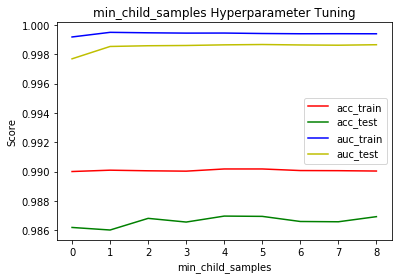

In [21]:
plt.plot(acc_train,color='r',label='acc_train')
plt.plot(acc_test,color='g',label='acc_test')
plt.plot(auc_train,color='b',label='auc_train')
plt.plot(auc_test,color='y',label='auc_test')
plt.xlabel('min_child_samples')
plt.ylabel('Score')
plt.title('min_child_samples Hyperparameter Tuning')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
lgb=LGBMClassifier()
params={'n_estimators': sp_randint(50,200), 'num_leaves':sp_randint(10,50),'max_depth':sp_randint(2,15),'learning_rate':sp_uniform(0,1),'min_child_samples':(2,50)}
rsearch=RandomizedSearchCV(estimator=lgb,param_distributions=params,cv=3,scoring='roc_auc',n_jobs=-1,random_state=1,n_iter=100)
rsearch.fit(x,y)
lgb=LGBMClassifier(**rsearch.best_params_)
lgb.fit(X_train,y_train)
y_train_pred=lgb.predict(X_train)
y_train_prob=lgb.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=lgb.predict(X_test)
y_test_prob=lgb.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9996923588592334
Confusion Matrix of train:  [[94720     1]
 [   36 25513]]
Auc of train:  0.9999998429769474
Accuracy score of test:  0.9880880783781162
Confusion Matrix of test:  [[40573   132]
 [  482 10358]]
Auc of test:  0.9987141506410765


In [9]:
from mlxtend.evaluate import bootstrap_point632_score

def bootstrap_estimate_and_ci(estimator, X, y, scoring_func=None, random_seed=0, 
                              method='.632', alpha=0.05, n_splits=200):
    scores = bootstrap_point632_score(estimator, X, y, scoring_func=scoring_func, 
                                      n_splits=n_splits, random_seed=random_seed, 
                                      method=method)
    estimate = np.mean(scores)
    lower_bound = np.percentile(scores, 100*(alpha/2))
    upper_bound = np.percentile(scores, 100*(1-alpha/2))
    stderr = np.std(scores)
    
    return estimate, lower_bound, upper_bound, stderr

In [27]:
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score
estimator = LGBMClassifier(**rsearch.best_params_)
X=x.values
y=y
est, low, up, stderr = bootstrap_estimate_and_ci(estimator, X, y,scoring_func=f1_score,alpha=0.1)

In [28]:
print(est)
print(low)
print(up)
print(stderr)

0.9792572442780796
0.9794379674673531
0.9812183182052465
0.015316798237562126


In [10]:
rsearch.best_params_

{'learning_rate': 0.1354279030721699,
 'max_depth': 13,
 'min_child_samples': 50,
 'n_estimators': 196,
 'num_leaves': 46}

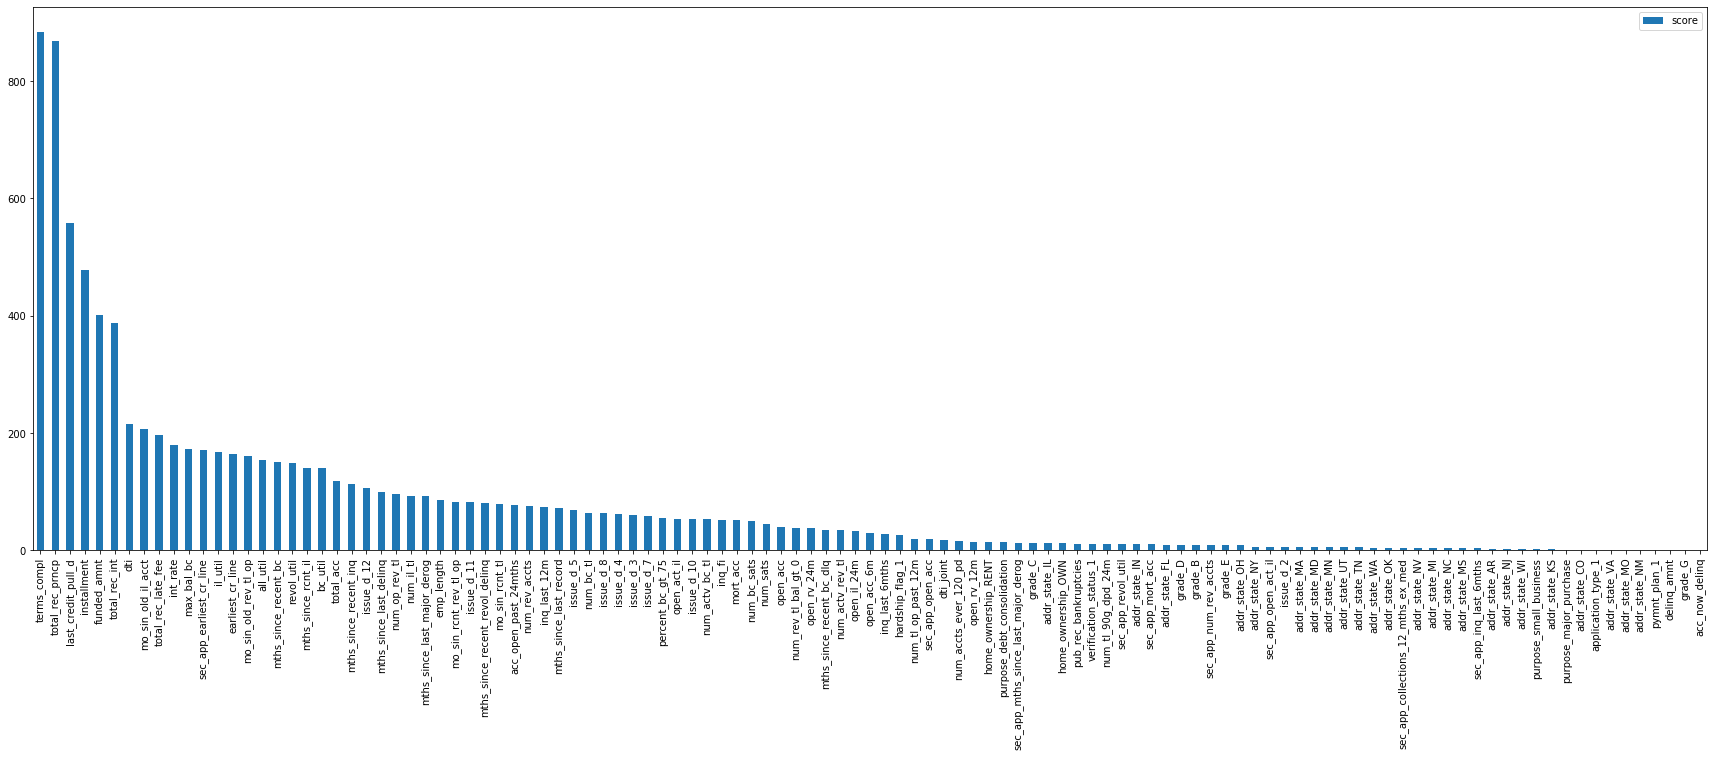

In [11]:
df_feature_imp = pd.DataFrame(lgb.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))

In [ ]:
['terms_compl','total_rec_prncp','last_credit_pull_d','installment','funded_amnt','total_rec_int','dti','total_rec_late_fee','int_rate']

In [16]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=400, depth=3, learning_rate=0.1)
model.fit(X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5839348	test: 0.5830595	best: 0.5830595 (0)	total: 165ms	remaining: 1m 5s
1:	learn: 0.5042168	test: 0.5028450	best: 0.5028450 (1)	total: 297ms	remaining: 59.2s
2:	learn: 0.4341733	test: 0.4326168	best: 0.4326168 (2)	total: 473ms	remaining: 1m 2s
3:	learn: 0.3783042	test: 0.3764581	best: 0.3764581 (3)	total: 652ms	remaining: 1m 4s
4:	learn: 0.3375311	test: 0.3354792	best: 0.3354792 (4)	total: 858ms	remaining: 1m 7s
5:	learn: 0.2980743	test: 0.2956509	best: 0.2956509 (5)	total: 1.18s	remaining: 1m 17s
6:	learn: 0.2615137	test: 0.2591115	best: 0.2591115 (6)	total: 1.44s	remaining: 1m 20s
7:	learn: 0.2480075	test: 0.2453626	best: 0.2453626 (7)	total: 1.56s	remaining: 1m 16s
8:	learn: 0.2317778	test: 0.2288783	best: 0.2288783 (8)	total: 1.73s	remaining: 1m 15s
9:	learn: 0.2141688	test: 0.2111169	best: 0.2111169 (9)	total: 1.87s	remaining: 1m 13s
10:	learn: 0.2002432	test: 0.1971443	best: 0.1971443 (10)	total: 2.04s	remaining: 1m 12s
11:	learn: 0.1946429	test: 0.1914607	best: 0.1

95:	learn: 0.0755518	test: 0.0744454	best: 0.0744454 (95)	total: 9.82s	remaining: 31.1s
96:	learn: 0.0749642	test: 0.0738614	best: 0.0738614 (96)	total: 9.9s	remaining: 30.9s
97:	learn: 0.0747010	test: 0.0736221	best: 0.0736221 (97)	total: 9.96s	remaining: 30.7s
98:	learn: 0.0743738	test: 0.0733258	best: 0.0733258 (98)	total: 10s	remaining: 30.5s
99:	learn: 0.0738122	test: 0.0728025	best: 0.0728025 (99)	total: 10.1s	remaining: 30.2s
100:	learn: 0.0734286	test: 0.0724823	best: 0.0724823 (100)	total: 10.1s	remaining: 30s
101:	learn: 0.0732568	test: 0.0723277	best: 0.0723277 (101)	total: 10.2s	remaining: 29.8s
102:	learn: 0.0726551	test: 0.0716840	best: 0.0716840 (102)	total: 10.3s	remaining: 29.6s
103:	learn: 0.0723864	test: 0.0714134	best: 0.0714134 (103)	total: 10.3s	remaining: 29.4s
104:	learn: 0.0721529	test: 0.0711741	best: 0.0711741 (104)	total: 10.5s	remaining: 29.4s
105:	learn: 0.0718746	test: 0.0709165	best: 0.0709165 (105)	total: 10.6s	remaining: 29.3s
106:	learn: 0.0714863	tes

189:	learn: 0.0543712	test: 0.0540895	best: 0.0540895 (189)	total: 16.5s	remaining: 18.2s
190:	learn: 0.0543114	test: 0.0540420	best: 0.0540420 (190)	total: 16.5s	remaining: 18.1s
191:	learn: 0.0541765	test: 0.0539159	best: 0.0539159 (191)	total: 16.6s	remaining: 18s
192:	learn: 0.0540184	test: 0.0537933	best: 0.0537933 (192)	total: 16.7s	remaining: 17.9s
193:	learn: 0.0539342	test: 0.0537179	best: 0.0537179 (193)	total: 16.7s	remaining: 17.8s
194:	learn: 0.0538787	test: 0.0536700	best: 0.0536700 (194)	total: 16.8s	remaining: 17.6s
195:	learn: 0.0537607	test: 0.0535223	best: 0.0535223 (195)	total: 16.8s	remaining: 17.5s
196:	learn: 0.0537019	test: 0.0534629	best: 0.0534629 (196)	total: 16.9s	remaining: 17.4s
197:	learn: 0.0536279	test: 0.0534168	best: 0.0534168 (197)	total: 17s	remaining: 17.3s
198:	learn: 0.0534650	test: 0.0532450	best: 0.0532450 (198)	total: 17s	remaining: 17.2s
199:	learn: 0.0533030	test: 0.0531062	best: 0.0531062 (199)	total: 17.1s	remaining: 17.1s
200:	learn: 0.05

284:	learn: 0.0459099	test: 0.0462246	best: 0.0462246 (284)	total: 23s	remaining: 9.26s
285:	learn: 0.0458701	test: 0.0461905	best: 0.0461905 (285)	total: 23s	remaining: 9.17s
286:	learn: 0.0457971	test: 0.0461253	best: 0.0461253 (286)	total: 23.1s	remaining: 9.08s
287:	learn: 0.0457956	test: 0.0461257	best: 0.0461253 (286)	total: 23.1s	remaining: 8.99s
288:	learn: 0.0457556	test: 0.0460957	best: 0.0460957 (288)	total: 23.2s	remaining: 8.91s
289:	learn: 0.0457391	test: 0.0460880	best: 0.0460880 (289)	total: 23.3s	remaining: 8.82s
290:	learn: 0.0456622	test: 0.0460207	best: 0.0460207 (290)	total: 23.3s	remaining: 8.73s
291:	learn: 0.0456371	test: 0.0460120	best: 0.0460120 (291)	total: 23.4s	remaining: 8.65s
292:	learn: 0.0455514	test: 0.0459048	best: 0.0459048 (292)	total: 23.5s	remaining: 8.57s
293:	learn: 0.0454933	test: 0.0458271	best: 0.0458271 (293)	total: 23.5s	remaining: 8.48s
294:	learn: 0.0454305	test: 0.0457528	best: 0.0457528 (294)	total: 23.6s	remaining: 8.4s
295:	learn: 0.0

376:	learn: 0.0416511	test: 0.0425288	best: 0.0425288 (376)	total: 30.7s	remaining: 1.88s
377:	learn: 0.0416480	test: 0.0425289	best: 0.0425288 (376)	total: 30.8s	remaining: 1.79s
378:	learn: 0.0415933	test: 0.0424838	best: 0.0424838 (378)	total: 30.9s	remaining: 1.71s
379:	learn: 0.0415730	test: 0.0424611	best: 0.0424611 (379)	total: 31s	remaining: 1.63s
380:	learn: 0.0415261	test: 0.0424126	best: 0.0424126 (380)	total: 31.1s	remaining: 1.55s
381:	learn: 0.0414994	test: 0.0424039	best: 0.0424039 (381)	total: 31.2s	remaining: 1.47s
382:	learn: 0.0414224	test: 0.0423284	best: 0.0423284 (382)	total: 31.3s	remaining: 1.39s
383:	learn: 0.0414216	test: 0.0423286	best: 0.0423284 (382)	total: 31.4s	remaining: 1.31s
384:	learn: 0.0414018	test: 0.0423128	best: 0.0423128 (384)	total: 31.5s	remaining: 1.23s
385:	learn: 0.0412936	test: 0.0422182	best: 0.0422182 (385)	total: 31.6s	remaining: 1.15s
386:	learn: 0.0412725	test: 0.0422055	best: 0.0422055 (386)	total: 31.7s	remaining: 1.07s
387:	learn: 

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
y_train_pred=model.predict(X_train)
y_train_prob=model.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))

y_test_pred=model.predict(X_test)
y_test_prob=model.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))

Accuracy score of train:  0.9870291843352457
Confusion Matrix of train:  [[94222   499]
 [ 1061 24488]]
Auc of train:  0.9982442116140688
Accuracy score of test:  0.9864778349015424
Confusion Matrix of test:  [[40452   253]
 [  444 10396]]
Auc of test:  0.9980466011637146


In [18]:
model = CatBoostClassifier(loss_function='Logloss')

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.0416116	best: 0.0416116 (0)	total: 1m 9s	remaining: 33m 38s
1:	loss: 0.0340153	best: 0.0340153 (1)	total: 2m 13s	remaining: 31m 3s
2:	loss: 0.0422748	best: 0.0340153 (1)	total: 3m 15s	remaining: 29m 19s
3:	loss: 0.0342304	best: 0.0340153 (1)	total: 4m 33s	remaining: 29m 39s
4:	loss: 0.0429774	best: 0.0340153 (1)	total: 5m 40s	remaining: 28m 20s
5:	loss: 0.0347576	best: 0.0340153 (1)	total: 6m 45s	remaining: 27m 3s
6:	loss: 0.0437769	best: 0.0340153 (1)	total: 8m 6s	remaining: 26m 38s
7:	loss: 0.0355523	best: 0.0340153 (1)	total: 9m 12s	remaining: 25m 18s
8:	loss: 0.0441770	best: 0.0340153 (1)	total: 10m 24s	remaining: 24m 17s
9:	loss: 0.0355223	best: 0.0340153 (1)	total: 11m 32s	remaining: 23m 4s
10:	loss: 0.0359559	best: 0.0340153 (1)	total: 13m	remaining: 22m 28s
11:	loss: 0.0327641	best: 0.0327641 (11)	total: 14m 42s	remaining: 22m 4s
12:	loss: 0.0370443	best: 0.0327641 (11)	total: 16m 5s	remaining: 21m 3s
13:	loss: 0.0329667	best: 0.0327641 (11)	total: 17m 30s	remaining:

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, classification_report
cat=CatBoostClassifier(depth= 6, l2_leaf_reg= 1, learning_rate= 0.1)
cat.fit(X_train,y_train)
y_train_pred=cat.predict(X_train)
y_train_prob=cat.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
print('CR Train: ', classification_report(y_train,y_train_pred))
y_test_pred=cat.predict(X_test)
y_test_prob=cat.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print('CR Test: ', classification_report(y_test,y_test_pred))

0:	learn: 0.5088473	total: 285ms	remaining: 4m 45s
1:	learn: 0.3979994	total: 558ms	remaining: 4m 38s
2:	learn: 0.3101331	total: 871ms	remaining: 4m 49s
3:	learn: 0.2699862	total: 1.15s	remaining: 4m 46s
4:	learn: 0.2382547	total: 1.37s	remaining: 4m 31s
5:	learn: 0.2161075	total: 1.58s	remaining: 4m 22s
6:	learn: 0.1884487	total: 1.78s	remaining: 4m 13s
7:	learn: 0.1698780	total: 1.99s	remaining: 4m 6s
8:	learn: 0.1500250	total: 2.21s	remaining: 4m 3s
9:	learn: 0.1447289	total: 2.39s	remaining: 3m 56s
10:	learn: 0.1330599	total: 2.58s	remaining: 3m 52s
11:	learn: 0.1248980	total: 2.75s	remaining: 3m 46s
12:	learn: 0.1178184	total: 2.92s	remaining: 3m 41s
13:	learn: 0.1117996	total: 3.06s	remaining: 3m 35s
14:	learn: 0.1064656	total: 3.23s	remaining: 3m 31s
15:	learn: 0.1025890	total: 3.37s	remaining: 3m 27s
16:	learn: 0.0998896	total: 3.51s	remaining: 3m 23s
17:	learn: 0.0959255	total: 3.65s	remaining: 3m 19s
18:	learn: 0.0938154	total: 3.8s	remaining: 3m 16s
19:	learn: 0.0916019	tota

160:	learn: 0.0373810	total: 21.7s	remaining: 1m 52s
161:	learn: 0.0373360	total: 21.8s	remaining: 1m 52s
162:	learn: 0.0371500	total: 21.9s	remaining: 1m 52s
163:	learn: 0.0371041	total: 22s	remaining: 1m 52s
164:	learn: 0.0369561	total: 22.1s	remaining: 1m 51s
165:	learn: 0.0369033	total: 22.2s	remaining: 1m 51s
166:	learn: 0.0368435	total: 22.3s	remaining: 1m 51s
167:	learn: 0.0367574	total: 22.4s	remaining: 1m 50s
168:	learn: 0.0366583	total: 22.5s	remaining: 1m 50s
169:	learn: 0.0366237	total: 22.6s	remaining: 1m 50s
170:	learn: 0.0365271	total: 22.7s	remaining: 1m 49s
171:	learn: 0.0364957	total: 22.8s	remaining: 1m 49s
172:	learn: 0.0363843	total: 22.9s	remaining: 1m 49s
173:	learn: 0.0363474	total: 23s	remaining: 1m 49s
174:	learn: 0.0363216	total: 23.1s	remaining: 1m 48s
175:	learn: 0.0363100	total: 23.1s	remaining: 1m 48s
176:	learn: 0.0362649	total: 23.3s	remaining: 1m 48s
177:	learn: 0.0361694	total: 23.3s	remaining: 1m 47s
178:	learn: 0.0361288	total: 23.4s	remaining: 1m 4

318:	learn: 0.0286542	total: 37.7s	remaining: 1m 20s
319:	learn: 0.0286227	total: 37.8s	remaining: 1m 20s
320:	learn: 0.0285972	total: 37.9s	remaining: 1m 20s
321:	learn: 0.0285645	total: 38s	remaining: 1m 20s
322:	learn: 0.0285311	total: 38.1s	remaining: 1m 19s
323:	learn: 0.0284897	total: 38.2s	remaining: 1m 19s
324:	learn: 0.0284562	total: 38.4s	remaining: 1m 19s
325:	learn: 0.0284319	total: 38.5s	remaining: 1m 19s
326:	learn: 0.0283573	total: 38.6s	remaining: 1m 19s
327:	learn: 0.0283356	total: 38.7s	remaining: 1m 19s
328:	learn: 0.0283227	total: 38.8s	remaining: 1m 19s
329:	learn: 0.0282908	total: 38.9s	remaining: 1m 18s
330:	learn: 0.0282268	total: 39s	remaining: 1m 18s
331:	learn: 0.0282130	total: 39s	remaining: 1m 18s
332:	learn: 0.0281913	total: 39.2s	remaining: 1m 18s
333:	learn: 0.0281707	total: 39.2s	remaining: 1m 18s
334:	learn: 0.0281458	total: 39.4s	remaining: 1m 18s
335:	learn: 0.0281237	total: 39.4s	remaining: 1m 17s
336:	learn: 0.0280683	total: 39.6s	remaining: 1m 17s

478:	learn: 0.0237520	total: 54.2s	remaining: 58.9s
479:	learn: 0.0237398	total: 54.3s	remaining: 58.8s
480:	learn: 0.0237315	total: 54.4s	remaining: 58.7s
481:	learn: 0.0237242	total: 54.5s	remaining: 58.5s
482:	learn: 0.0236954	total: 54.6s	remaining: 58.4s
483:	learn: 0.0236771	total: 54.7s	remaining: 58.3s
484:	learn: 0.0236666	total: 54.8s	remaining: 58.2s
485:	learn: 0.0236517	total: 54.9s	remaining: 58s
486:	learn: 0.0236352	total: 55s	remaining: 57.9s
487:	learn: 0.0236182	total: 55.1s	remaining: 57.8s
488:	learn: 0.0235875	total: 55.2s	remaining: 57.6s
489:	learn: 0.0235222	total: 55.3s	remaining: 57.5s
490:	learn: 0.0234864	total: 55.4s	remaining: 57.4s
491:	learn: 0.0234310	total: 55.5s	remaining: 57.3s
492:	learn: 0.0233874	total: 55.6s	remaining: 57.1s
493:	learn: 0.0233411	total: 55.7s	remaining: 57s
494:	learn: 0.0233249	total: 55.8s	remaining: 56.9s
495:	learn: 0.0233051	total: 55.9s	remaining: 56.8s
496:	learn: 0.0232688	total: 56s	remaining: 56.6s
497:	learn: 0.023231

637:	learn: 0.0200651	total: 1m 10s	remaining: 40s
638:	learn: 0.0200516	total: 1m 10s	remaining: 39.9s
639:	learn: 0.0200363	total: 1m 10s	remaining: 39.8s
640:	learn: 0.0200068	total: 1m 10s	remaining: 39.6s
641:	learn: 0.0199683	total: 1m 10s	remaining: 39.5s
642:	learn: 0.0199307	total: 1m 11s	remaining: 39.4s
643:	learn: 0.0198906	total: 1m 11s	remaining: 39.3s
644:	learn: 0.0198620	total: 1m 11s	remaining: 39.2s
645:	learn: 0.0198540	total: 1m 11s	remaining: 39.1s
646:	learn: 0.0198404	total: 1m 11s	remaining: 38.9s
647:	learn: 0.0198264	total: 1m 11s	remaining: 38.8s
648:	learn: 0.0198135	total: 1m 11s	remaining: 38.7s
649:	learn: 0.0197971	total: 1m 11s	remaining: 38.6s
650:	learn: 0.0197822	total: 1m 11s	remaining: 38.5s
651:	learn: 0.0197731	total: 1m 11s	remaining: 38.4s
652:	learn: 0.0197617	total: 1m 11s	remaining: 38.3s
653:	learn: 0.0197268	total: 1m 12s	remaining: 38.1s
654:	learn: 0.0196837	total: 1m 12s	remaining: 38s
655:	learn: 0.0196633	total: 1m 12s	remaining: 37.

794:	learn: 0.0170230	total: 1m 26s	remaining: 22.3s
795:	learn: 0.0170057	total: 1m 26s	remaining: 22.2s
796:	learn: 0.0169784	total: 1m 26s	remaining: 22.1s
797:	learn: 0.0169667	total: 1m 26s	remaining: 21.9s
798:	learn: 0.0169463	total: 1m 26s	remaining: 21.8s
799:	learn: 0.0169321	total: 1m 26s	remaining: 21.7s
800:	learn: 0.0169138	total: 1m 26s	remaining: 21.6s
801:	learn: 0.0168911	total: 1m 27s	remaining: 21.5s
802:	learn: 0.0168816	total: 1m 27s	remaining: 21.4s
803:	learn: 0.0168552	total: 1m 27s	remaining: 21.3s
804:	learn: 0.0168184	total: 1m 27s	remaining: 21.1s
805:	learn: 0.0168070	total: 1m 27s	remaining: 21s
806:	learn: 0.0167981	total: 1m 27s	remaining: 20.9s
807:	learn: 0.0167847	total: 1m 27s	remaining: 20.8s
808:	learn: 0.0167664	total: 1m 27s	remaining: 20.7s
809:	learn: 0.0167617	total: 1m 27s	remaining: 20.6s
810:	learn: 0.0167454	total: 1m 27s	remaining: 20.5s
811:	learn: 0.0167351	total: 1m 27s	remaining: 20.3s
812:	learn: 0.0167162	total: 1m 27s	remaining: 2

951:	learn: 0.0143964	total: 1m 40s	remaining: 5.05s
952:	learn: 0.0143813	total: 1m 40s	remaining: 4.94s
953:	learn: 0.0143675	total: 1m 40s	remaining: 4.83s
954:	learn: 0.0143573	total: 1m 40s	remaining: 4.73s
955:	learn: 0.0143451	total: 1m 40s	remaining: 4.62s
956:	learn: 0.0143305	total: 1m 40s	remaining: 4.52s
957:	learn: 0.0143122	total: 1m 40s	remaining: 4.41s
958:	learn: 0.0142978	total: 1m 40s	remaining: 4.3s
959:	learn: 0.0142893	total: 1m 40s	remaining: 4.2s
960:	learn: 0.0142821	total: 1m 40s	remaining: 4.09s
961:	learn: 0.0142756	total: 1m 40s	remaining: 3.99s
962:	learn: 0.0142391	total: 1m 41s	remaining: 3.88s
963:	learn: 0.0142169	total: 1m 41s	remaining: 3.78s
964:	learn: 0.0142109	total: 1m 41s	remaining: 3.67s
965:	learn: 0.0141968	total: 1m 41s	remaining: 3.56s
966:	learn: 0.0141831	total: 1m 41s	remaining: 3.46s
967:	learn: 0.0141654	total: 1m 41s	remaining: 3.35s
968:	learn: 0.0141499	total: 1m 41s	remaining: 3.25s
969:	learn: 0.0141410	total: 1m 41s	remaining: 3

In [33]:
from catboost import CatBoostClassifier, Pool, cv
import hyperopt
def hyperopt_objective(params):
    model = CatBoostClassifier(
        l2_leaf_reg=int(params['l2_leaf_reg']),
        max_depth=int(params['max_depth']),
        iterations=10,
        eval_metric='Accuracy',
        loss_function='Logloss',
        random_seed=1,
        logging_level='Silent',
        od_type = 'IncToDec',
        od_wait = 20
    )
    cv_data = cv(
       Pool(X_train, y_train),
        model.get_params()
    )
    
    best_accuracy = np.max(cv_data['test-Accuracy-mean'])
    
    return 1 - best_accuracy
params_space = {
    'l2_leaf_reg': hyperopt.hp.quniform('l2_leaf_reg', 1, 7, 1),
    'max_depth': hyperopt.hp.quniform('max_depth', 2, 8, 1)}

trials = hyperopt.Trials(refresh=True)

best = hyperopt.fmin(
    hyperopt_objective,
    space=params_space,
    algo=hyperopt.tpe.suggest,
    max_evals=10,
    trials=trials )

print(best)



100%|███████████████████████████████████████████████| 10/10 [03:24<00:00, 20.41s/trial, best loss: 0.03696681781578415]
{'l2_leaf_reg': 4.0, 'max_depth': 8.0}


In [34]:
model = CatBoostClassifier(
    max_depth = int(best['max_depth']),
    l2_leaf_reg = int(best['l2_leaf_reg']),
    iterations=750,
    eval_metric='Accuracy',
    random_seed = 1)

model.fit(X_train, y_train)

0:	learn: 0.9486489	total: 399ms	remaining: 4m 58s
1:	learn: 0.9516172	total: 1.06s	remaining: 6m 38s
2:	learn: 0.9601064	total: 1.44s	remaining: 5m 58s
3:	learn: 0.9619772	total: 1.78s	remaining: 5m 32s
4:	learn: 0.9628586	total: 2.08s	remaining: 5m 9s
5:	learn: 0.9624595	total: 2.38s	remaining: 4m 55s
6:	learn: 0.9626341	total: 2.64s	remaining: 4m 40s
7:	learn: 0.9636235	total: 2.92s	remaining: 4m 30s
8:	learn: 0.9641473	total: 3.32s	remaining: 4m 33s
9:	learn: 0.9639561	total: 3.59s	remaining: 4m 26s
10:	learn: 0.9638979	total: 3.83s	remaining: 4m 17s
11:	learn: 0.9636235	total: 4.22s	remaining: 4m 19s
12:	learn: 0.9641390	total: 4.7s	remaining: 4m 26s
13:	learn: 0.9644633	total: 4.98s	remaining: 4m 22s
14:	learn: 0.9643552	total: 5.19s	remaining: 4m 14s
15:	learn: 0.9644134	total: 5.44s	remaining: 4m 9s
16:	learn: 0.9649539	total: 5.7s	remaining: 4m 5s
17:	learn: 0.9653696	total: 5.88s	remaining: 3m 59s
18:	learn: 0.9656772	total: 6.07s	remaining: 3m 53s
19:	learn: 0.9658768	total:

159:	learn: 0.9840359	total: 30.2s	remaining: 1m 51s
160:	learn: 0.9840525	total: 30.3s	remaining: 1m 50s
161:	learn: 0.9840276	total: 30.5s	remaining: 1m 50s
162:	learn: 0.9841108	total: 30.6s	remaining: 1m 50s
163:	learn: 0.9840692	total: 30.8s	remaining: 1m 49s
164:	learn: 0.9840692	total: 30.9s	remaining: 1m 49s
165:	learn: 0.9840941	total: 31.1s	remaining: 1m 49s
166:	learn: 0.9841440	total: 31.2s	remaining: 1m 48s
167:	learn: 0.9842521	total: 31.3s	remaining: 1m 48s
168:	learn: 0.9842604	total: 31.5s	remaining: 1m 48s
169:	learn: 0.9842687	total: 31.6s	remaining: 1m 47s
170:	learn: 0.9843186	total: 31.7s	remaining: 1m 47s
171:	learn: 0.9843851	total: 31.9s	remaining: 1m 47s
172:	learn: 0.9843934	total: 32s	remaining: 1m 46s
173:	learn: 0.9845182	total: 32.1s	remaining: 1m 46s
174:	learn: 0.9845265	total: 32.3s	remaining: 1m 46s
175:	learn: 0.9846096	total: 32.4s	remaining: 1m 45s
176:	learn: 0.9846179	total: 32.5s	remaining: 1m 45s
177:	learn: 0.9846096	total: 32.7s	remaining: 1m

316:	learn: 0.9871705	total: 56.1s	remaining: 1m 16s
317:	learn: 0.9871539	total: 56.2s	remaining: 1m 16s
318:	learn: 0.9871705	total: 56.4s	remaining: 1m 16s
319:	learn: 0.9871705	total: 56.5s	remaining: 1m 15s
320:	learn: 0.9872038	total: 56.6s	remaining: 1m 15s
321:	learn: 0.9872038	total: 56.8s	remaining: 1m 15s
322:	learn: 0.9872287	total: 56.9s	remaining: 1m 15s
323:	learn: 0.9872703	total: 57s	remaining: 1m 14s
324:	learn: 0.9872038	total: 57.2s	remaining: 1m 14s
325:	learn: 0.9872703	total: 57.3s	remaining: 1m 14s
326:	learn: 0.9872869	total: 57.4s	remaining: 1m 14s
327:	learn: 0.9872869	total: 57.5s	remaining: 1m 14s
328:	learn: 0.9873119	total: 57.7s	remaining: 1m 13s
329:	learn: 0.9873451	total: 57.8s	remaining: 1m 13s
330:	learn: 0.9873285	total: 58s	remaining: 1m 13s
331:	learn: 0.9873701	total: 58.1s	remaining: 1m 13s
332:	learn: 0.9873701	total: 58.2s	remaining: 1m 12s
333:	learn: 0.9873701	total: 58.4s	remaining: 1m 12s
334:	learn: 0.9873701	total: 58.5s	remaining: 1m 1

474:	learn: 0.9885508	total: 1m 16s	remaining: 44.3s
475:	learn: 0.9885508	total: 1m 16s	remaining: 44.1s
476:	learn: 0.9885840	total: 1m 16s	remaining: 43.9s
477:	learn: 0.9885923	total: 1m 16s	remaining: 43.8s
478:	learn: 0.9885923	total: 1m 17s	remaining: 43.6s
479:	learn: 0.9886006	total: 1m 17s	remaining: 43.4s
480:	learn: 0.9886006	total: 1m 17s	remaining: 43.2s
481:	learn: 0.9885923	total: 1m 17s	remaining: 43s
482:	learn: 0.9885923	total: 1m 17s	remaining: 42.8s
483:	learn: 0.9886256	total: 1m 17s	remaining: 42.7s
484:	learn: 0.9886173	total: 1m 17s	remaining: 42.5s
485:	learn: 0.9886173	total: 1m 17s	remaining: 42.3s
486:	learn: 0.9886173	total: 1m 18s	remaining: 42.1s
487:	learn: 0.9886422	total: 1m 18s	remaining: 42s
488:	learn: 0.9886589	total: 1m 18s	remaining: 41.8s
489:	learn: 0.9886838	total: 1m 18s	remaining: 41.6s
490:	learn: 0.9886838	total: 1m 18s	remaining: 41.4s
491:	learn: 0.9887004	total: 1m 18s	remaining: 41.2s
492:	learn: 0.9887171	total: 1m 18s	remaining: 41.

630:	learn: 0.9901139	total: 1m 38s	remaining: 18.5s
631:	learn: 0.9901139	total: 1m 38s	remaining: 18.3s
632:	learn: 0.9901305	total: 1m 38s	remaining: 18.2s
633:	learn: 0.9901389	total: 1m 38s	remaining: 18s
634:	learn: 0.9901555	total: 1m 38s	remaining: 17.9s
635:	learn: 0.9901721	total: 1m 38s	remaining: 17.7s
636:	learn: 0.9901887	total: 1m 39s	remaining: 17.6s
637:	learn: 0.9901887	total: 1m 39s	remaining: 17.4s
638:	learn: 0.9901804	total: 1m 39s	remaining: 17.2s
639:	learn: 0.9901887	total: 1m 39s	remaining: 17.1s
640:	learn: 0.9902054	total: 1m 39s	remaining: 17s
641:	learn: 0.9902054	total: 1m 39s	remaining: 16.8s
642:	learn: 0.9902054	total: 1m 40s	remaining: 16.6s
643:	learn: 0.9902220	total: 1m 40s	remaining: 16.5s
644:	learn: 0.9902469	total: 1m 40s	remaining: 16.3s
645:	learn: 0.9902553	total: 1m 40s	remaining: 16.2s
646:	learn: 0.9902469	total: 1m 40s	remaining: 16s
647:	learn: 0.9902386	total: 1m 40s	remaining: 15.9s
648:	learn: 0.9902469	total: 1m 41s	remaining: 15.7s

In [35]:
y_train_pred=cat.predict(X_train)
y_train_prob=cat.predict_proba(X_train)[:,1]

print('Accuracy score of train: ', accuracy_score(y_train,y_train_pred))
print('Confusion Matrix of train: ', confusion_matrix(y_train,y_train_pred))
print('Auc of train: ', roc_auc_score(y_train,y_train_prob))
print('CR Train: ', classification_report(y_train,y_train_pred))
y_test_pred=cat.predict(X_test)
y_test_prob=cat.predict_proba(X_test)[:,1]
print('Accuracy score of test: ', accuracy_score(y_test,y_test_pred))
print('Confusion Matrix of test: ', confusion_matrix(y_test,y_test_pred))
print('Auc of test: ', roc_auc_score(y_test,y_test_prob))
print('CR Test: ', classification_report(y_test,y_test_pred))

Accuracy score of train:  0.9973476344890663
Confusion Matrix of train:  [[94703    18]
 [  301 25248]]
Auc of train:  0.999933319747506
CR Train:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     94721
           1       1.00      0.99      0.99     25549

    accuracy                           1.00    120270
   macro avg       1.00      0.99      1.00    120270
weighted avg       1.00      1.00      1.00    120270

Accuracy score of test:  0.9881462799495586
Confusion Matrix of test:  [[40561   144]
 [  467 10373]]
Auc of test:  0.998700507340413
CR Test:                precision    recall  f1-score   support

           0       0.99      1.00      0.99     40705
           1       0.99      0.96      0.97     10840

    accuracy                           0.99     51545
   macro avg       0.99      0.98      0.98     51545
weighted avg       0.99      0.99      0.99     51545



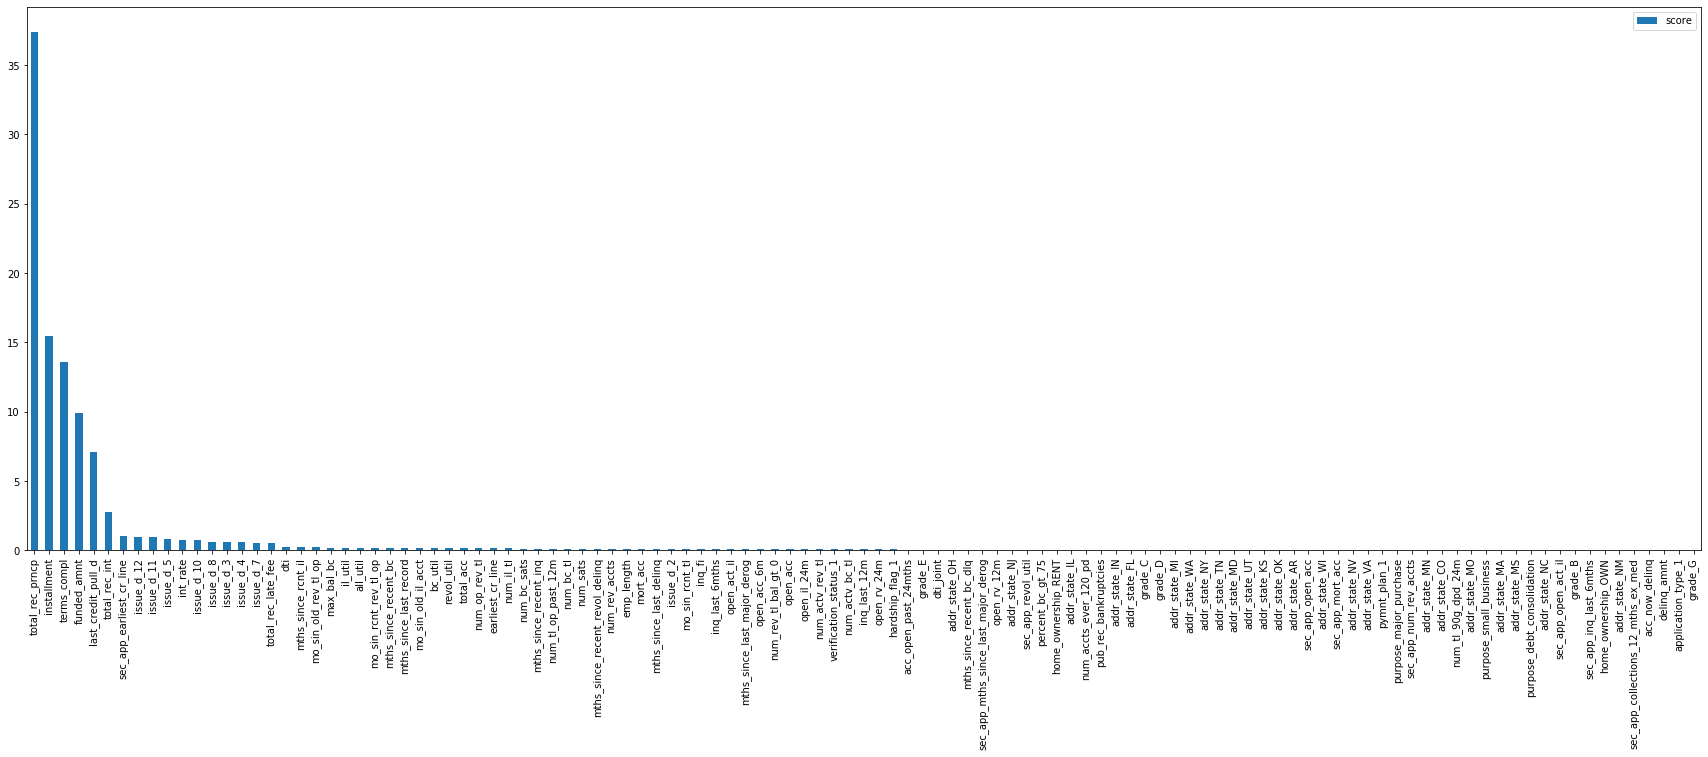

In [37]:
df_feature_imp = pd.DataFrame(cat.feature_importances_, index=X_train.columns, columns=['score'])
df_feature_imp.sort_values('score', ascending=False).plot.bar(figsize=(30, 10))